[https://www.kaggle.com/datasets/bobnau/daily-website-visitors/data](https://)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams['figure.figsize']=[7,3]


In [ ]:
df=pd.read_csv('/content/archive (74).zip')

df.head()

,Row,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
1,2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
2,3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
3,4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
4,5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [ ]:
df.drop(['Row'],axis=1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                2167 non-null   object
 1   Day.Of.Week        2167 non-null   int64 
 2   Date               2167 non-null   object
 3   Page.Loads         2167 non-null   object
 4   Unique.Visits      2167 non-null   object
 5   First.Time.Visits  2167 non-null   object
 6   Returning.Visits   2167 non-null   object
dtypes: int64(1), object(6)
memory usage: 118.6+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
def remove_comma(x):
  return float(x.replace(',',''))

remove_comma('2,146')

2146.0

In [ ]:
cols=df.iloc[:,3:].columns.to_list()

for col in cols:
  df[col] = df[col].apply(remove_comma)


In [ ]:
df.head()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
0,Sunday,1,2014-09-14,2146.0,1582.0,1430.0,152.0
1,Monday,2,2014-09-15,3621.0,2528.0,2297.0,231.0
2,Tuesday,3,2014-09-16,3698.0,2630.0,2352.0,278.0
3,Wednesday,4,2014-09-17,3667.0,2614.0,2327.0,287.0
4,Thursday,5,2014-09-18,3316.0,2366.0,2130.0,236.0


In [ ]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day_num'] = df['Date'].dt.day
df.head()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,year,month,day_num
0,Sunday,1,2014-09-14,2146.0,1582.0,1430.0,152.0,2014,9,14
1,Monday,2,2014-09-15,3621.0,2528.0,2297.0,231.0,2014,9,15
2,Tuesday,3,2014-09-16,3698.0,2630.0,2352.0,278.0,2014,9,16
3,Wednesday,4,2014-09-17,3667.0,2614.0,2327.0,287.0,2014,9,17
4,Thursday,5,2014-09-18,3316.0,2366.0,2130.0,236.0,2014,9,18


In [ ]:
df['month'] = df['Date'].dt.month_name()

#EDA

<Axes: xlabel='year'>

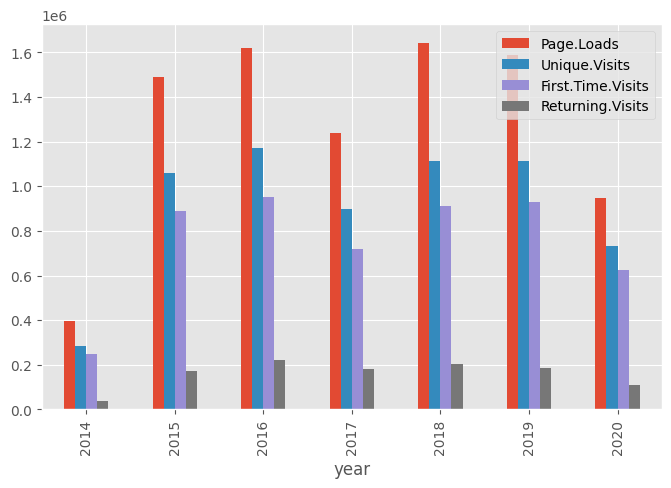

In [ ]:
df.groupby(['year'])[cols].sum().plot.bar(figsize=(8,5))



<Axes: xlabel='month'>

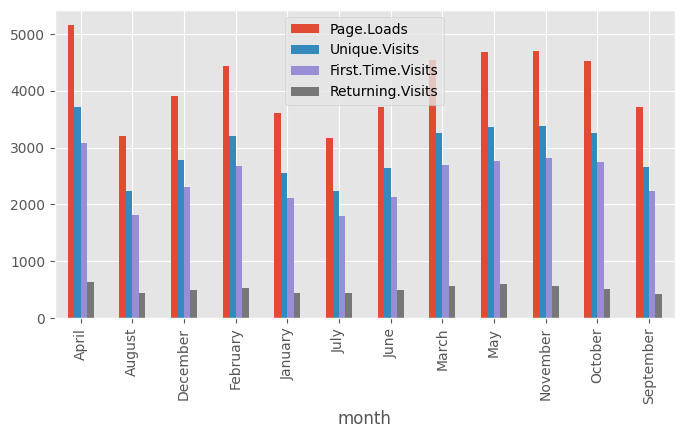

In [ ]:
df.groupby(['month'])[cols].mean().plot.bar(figsize=(8,4))

<Axes: xlabel='Day'>

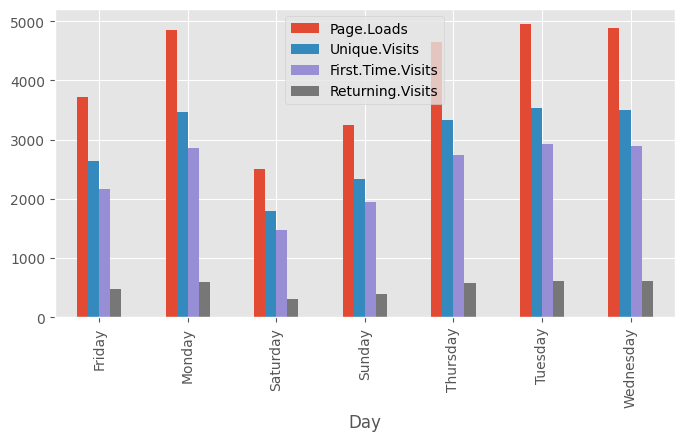

In [ ]:
df.groupby(['Day'])[cols].mean().plot.bar(figsize=(8,4))

<Axes: xlabel='day_num'>

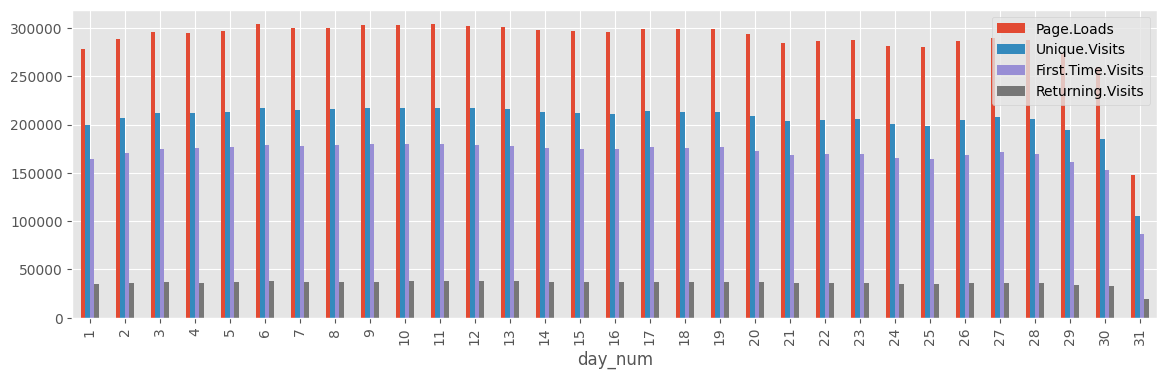

In [ ]:
df.groupby(['day_num'])[cols].sum().plot.bar(figsize=(14,4))

In [ ]:
df.head()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,year,month,day_num
0,Sunday,1,2014-09-14,2146.0,1582.0,1430.0,152.0,2014,September,14
1,Monday,2,2014-09-15,3621.0,2528.0,2297.0,231.0,2014,September,15
2,Tuesday,3,2014-09-16,3698.0,2630.0,2352.0,278.0,2014,September,16
3,Wednesday,4,2014-09-17,3667.0,2614.0,2327.0,287.0,2014,September,17
4,Thursday,5,2014-09-18,3316.0,2366.0,2130.0,236.0,2014,September,18


In [ ]:
data = df.iloc[:,2:]
data['month'] = data['Date'].dt.month
data

,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,year,month,day_num
0,2014-09-14,2146.0,1582.0,1430.0,152.0,2014,9,14
1,2014-09-15,3621.0,2528.0,2297.0,231.0,2014,9,15
2,2014-09-16,3698.0,2630.0,2352.0,278.0,2014,9,16
3,2014-09-17,3667.0,2614.0,2327.0,287.0,2014,9,17
4,2014-09-18,3316.0,2366.0,2130.0,236.0,2014,9,18
...,...,...,...,...,...,...,...,...
2162,2020-08-15,2221.0,1696.0,1373.0,323.0,2020,8,15
2163,2020-08-16,2724.0,2037.0,1686.0,351.0,2020,8,16
2164,2020-08-17,3456.0,2638.0,2181.0,457.0,2020,8,17
2165,2020-08-18,3581.0,2683.0,2184.0,499.0,2020,8,18


In [ ]:
data.iloc[:,:-3].corr()

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Page.Loads,1.000000,0.988691,0.980704,0.913340
Unique.Visits,0.988691,1.000000,0.996164,0.902950
First.Time.Visits,0.980704,0.996164,1.000000,0.861882
Returning.Visits,0.913340,0.902950,0.861882,1.000000


In [ ]:
data.set_index('Date',inplace=True)
data.head()

,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits,year,month,day_num
Date,,,,,,,
2014-09-14,2146.0,1582.0,1430.0,152.0,2014,9,14
2014-09-15,3621.0,2528.0,2297.0,231.0,2014,9,15
2014-09-16,3698.0,2630.0,2352.0,278.0,2014,9,16
2014-09-17,3667.0,2614.0,2327.0,287.0,2014,9,17
2014-09-18,3316.0,2366.0,2130.0,236.0,2014,9,18


In [ ]:
x = data.drop(['Returning.Visits','Page.Loads','Unique.Visits'],axis=1)
y = data['Returning.Visits']


In [ ]:
data.shape

(2167, 7)

In [ ]:
train = data.iloc[:1800,:]
test = data.iloc[1800:,:]

train.shape,test.shape

((1800, 7), (367, 7))

In [ ]:
train.columns

Index(['Page.Loads', 'Unique.Visits', 'First.Time.Visits', 'Returning.Visits',
       'year', 'month', 'day_num'],
      dtype='object')

In [ ]:
x_train,y_train = train.drop(['Returning.Visits'],axis=1),train['Returning.Visits']
x_test,y_test = test.drop(['Returning.Visits'],axis=1),test['Returning.Visits']



In [ ]:
linear=LinearRegression()
linear.fit(x_train,y_train)


linear.score(x_test,y_test)

1.0

In [ ]:
from sklearn.metrics import mean_absolute_error as mae
y_pred = linear.predict(x_test)
mae(y_test,y_pred)

1.0797151849555658e-12

<Axes: xlabel='Returning.Visits'>

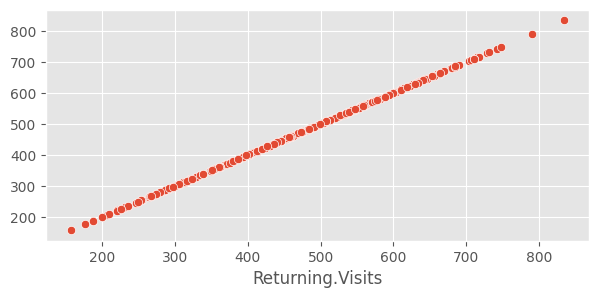

In [ ]:
sns.scatterplot(x=y_test,y=y_pred)

<Axes: ylabel='Returning.Visits'>

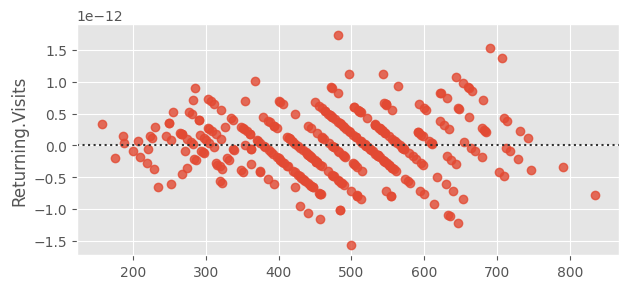

In [ ]:
sns.residplot(x=y_pred,y=y_test-y_pred)

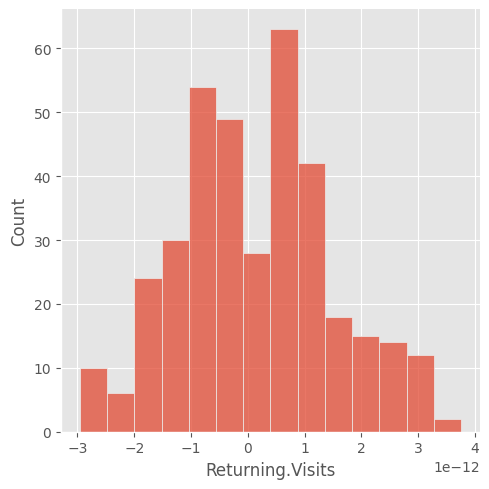

In [ ]:
sns.displot(y_test-y_pred)

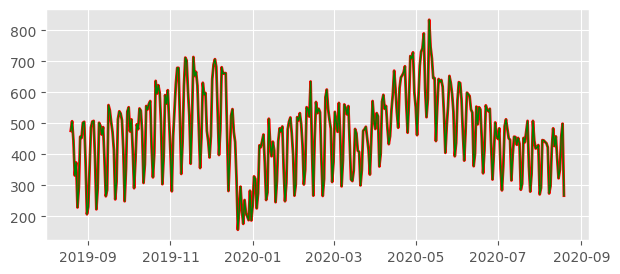

In [ ]:
plt.plot(x_test.index,y_test,color='r',lw=2)
plt.plot(x_test.index,y_pred,color='g',lw=1)
plt.show()